# Aspiration with ramp-hold, fitting to aspirated length 


## (1) Prescribed Pressure Profile

Pressure $P(t)$ is a ramp-and-hold shape. Below its definition and its derivative. Plotted at the end of this notebook

$$ 
P(t)=
\begin{cases}
 &Q\cdot t \quad \text{ for } t\le t_r \\
 &Q \cdot t_r \quad \text{for } t>t_r 
\end{cases} \qquad \Rightarrow \qquad
\frac{\mathrm{d} P(t)}{\mathrm{d} t}=
\begin{cases}
 &Q  \qquad \text{ for } t\le t_r \\
 &0 \qquad \text{ for } t>t_r 
\end{cases} 
$$

Where $t_r$ is the ramp time, and $Q$ is the rate of pressure change

## (2) Boltzmann Hereditary Integral, and the case of aspiration

Also called *Duhamel's integral*, which given an arbitrary stress profile $\sigma(t)$, produces the resulting strain:

$$
\varepsilon(t) =\int_{-\infty}^t J(t-\xi)\frac{\mathrm{d} \sigma(\xi)}{\mathrm{d} \xi} \mathrm{d} \xi
$$

Where $J(\xi)$ is the Creep Compliance function (assuming the material is non-ageing).

For an aspiration experiment [(von Dassow 2010)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0015359), stress $\sigma(t) = P(t)$, and strain $\varepsilon(t) = -{L(t)} / {kR_c}$, where $R_c$ is the channel radius and $k$ an adimensional geometrical constant (related to the wall function). 
The Boltzmann integral then becomes:

$$
L(t) = -k \ R_c \int_0^t J(t-\xi)\frac{\mathrm{d} P(\xi)}{\mathrm{d} \xi} \mathrm{d} \xi
$$

Where $J(t)$ can take any form

## (3) Creep Compliance function

The Creep Compliance Function $J(t)$ is where the modeling choices come into play. We will first use one of the most common: the Power Law Viscoelastic

$$
J_{PL}(t) = A\  t^{\,\beta}
$$

Where $A$ and $\beta$ are the mechanical parameters, respectively the scaling factor and the time-dependent descriptor. 

*****

## Solving the integral

Given the pressure profile as prescribed above in (1), we can solve the Boltzmann integral in (2) with the Creep compliance function define in (3).

- During the ramp $t \le t_r$, the derivative $\frac{\mathrm{d} P(t)}{\mathrm{d} t}=Q$) and we can write the Boltzamm Integral for the Aspirated Lenght $L_1(t)$: 

$$
L_1(t) = -k \ R_c \int_0^t A \ (t-\xi)^\beta Q \mathrm{d} \xi = -k \ R_c \ A \ Q \cdot \left[  -\frac{(t-\xi)^{\beta+1}}{\beta+1} \right]^t_0 =  \\ k \ R_c \ A \ Q \cdot \frac{t^{\beta + 1}}{\beta+1}
$$

- And when $t > t_r$ (after the ramp ends), we split the integral of the aspirated length $L_2(t)$ into the interval of the ramp (where the derivative $\frac{\mathrm{d} P(t)}{\mathrm{d} t}=Q$), and into the hold one (where the derivative $\frac{\mathrm{d} P(t)}{\mathrm{d} t}= \emptyset$ so that the integral in that interval is zero). 

$$
L_2(t) = -k \ R_c \cdot \left[  \int_0^{t_r^-} A \ (t-\xi)^\beta Q \mathrm{d} \xi + \int_{t_r^+}^t A \ (t-\xi)^\beta \ \emptyset \  \mathrm{d} \xi \right] =\\ 
$$

$$
-k \ R_c \ A \ Q \cdot \left[  \int_0^{t_r} \ (t-\xi)^\beta  \ \mathrm{d} \xi \right] =
$$

$$
-k \ R_c \ A \ Q \cdot \frac{ t^{\beta+1} - (t-t_r)^{\beta+1} }{\beta+1}
$$


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import power as pow 

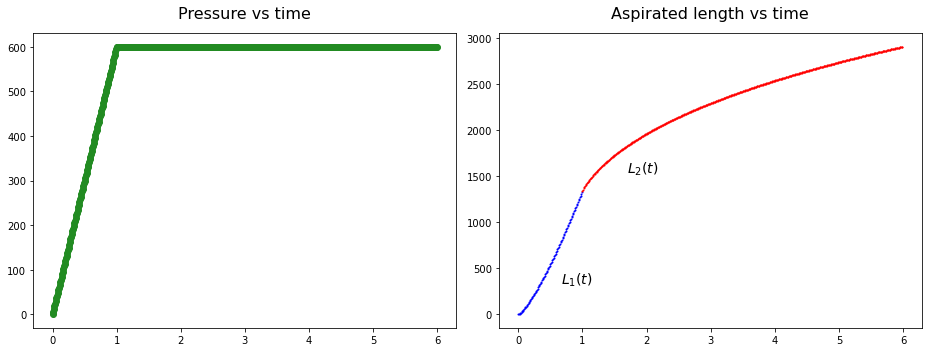

In [9]:
## Experiment parameters
tr = 1 # ramp time
k = 0.97 # wall function
Rc = 60 # microns
Q = 600 # cmH20/second

## Mechanical Model Parameters
A = 0.05
beta = 0.3

# Solution for the ramp 
def L1(t):
    return k*Rc*A*Q* pow(t, beta+1) / (beta+1)

# Solution for the hold phase
def L2(t):
    return (k*Rc*A*Q) * (pow(t,beta+1)-pow(t-tr, beta+1)) / (beta+1)

# defining the time intervals: t1 is the ramp and t2 the hold
t1 = np.arange(start = 0, stop = tr, step = 0.01) # for the ramp interval
t2 = np.arange(start = tr, stop = 6, step = 0.01) # for the hold interval

fig,ax = plt.subplots(ncols=2, figsize=(13,5));
ax[0].set_title('Pressure vs time', fontsize=16, pad=15)
ax[0].scatter(t1, t1*Q, c = 'forestgreen') # ramp
ax[0].scatter(t2, [tr*Q]*len(t2), c = 'forestgreen') # hold

ax[1].set_title('Aspirated length vs time', fontsize=16, pad=15)
ax[1].scatter(t1, L1(t1), c='blue', s = 1);
ax[1].scatter(t2, L2(t2), c='red', s = 1);
ax[1].text(0.66*tr, 0.25*L1(tr), r"$L_1(t)$", fontsize = 14);
ax[1].text(1.7*tr, 1.15*L2(tr), r"$L_2(t)$", fontsize = 14);

plt.tight_layout()

## Standard Linear Solid as Alternative Creep Compliance Function

The Creep Compliance function can be arbitrarily chosen; another common one, [(Guilak 1999)](https://www.ncbi.nlm.nih.gov/pubmed/10626310) is the [Standard Linear Solid](https://en.wikipedia.org/wiki/Standard_linear_solid_model), a three-parameter spring/dashpot model. 
For the SLS,
$$
J_{SLS}(t) = \frac{1}{k_1} \left( 1 - \frac{k_2}{k_1+k_2}e^{-t/\tau} \right)
$$ 

With respect to the Power Law example above, a slightly different normalization of Aspirated Length (to transform it into strain) is used. It's a matter of geometrical factors that scale results linearly and shouldn't worry too much.  
Using $J_{SLS}$, we can write the Hereditary integral [(Pravincumar 2012)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3439462/) as: 

$$
L(t) = \int_0^t \frac{\phi \ R_c}{\pi k_1} \left[ 1 - \frac{k_2}{k_1+k_2}e^{-(t-\xi)/\tau} \right] \frac{\mathrm{d} P(\xi)}{\mathrm{d} \xi} \mathrm{d} \xi
$$

Where $R_c$ is the radius of the aperture, $\phi$ is the adimensional wall function, $k_1$ and $k_2$ the spring constants in the models and $\tau = \mu (k_1 + k_2) / k_1k_2)$, with $\mu$ being the dashpot constant.

Again, for the ramp-and-hold Pressure profile described in Section (1) above, we can solve the integral by splitting it into the ramp interval and in the hold one.  We obtain an analytical solution defined over the two intervals as follows: 
$$
L(t)=
\begin{cases}
 & \frac{a Q \phi}{\pi k_1} \left[ t + \frac{k_2 \tau}{k_1+k_2} \left( -1+e^{t/\tau} \right) \right] \\
 & \frac{a Q \phi}{\pi k_1} \left[ t_r - \frac{k_2 \tau}{k_1+k_2} \left( e^{t/\tau} \left( -1+e^{t_r/\tau}\right) \right) \right]
\end{cases}
$$

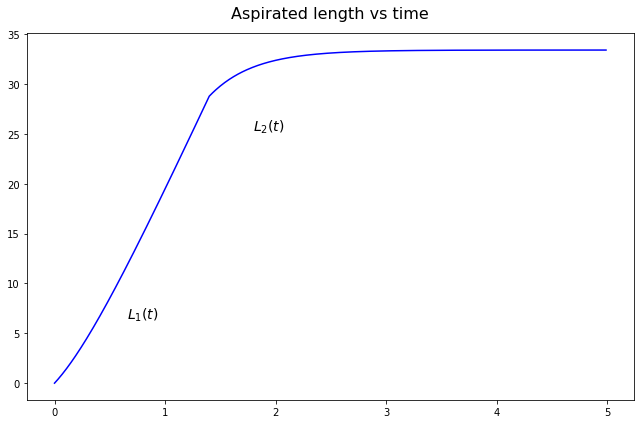

In [10]:
## Standard Linear Solid
# note: capital P stands for `pressure`, small p stands `parameters`
pSLS = dict(
    k1 = 10.,
    k2 = 10.,
    mu = 2.,
    tr = 1.4
)

phi = 2.1 # wall function
a = 2.5 # mm -> also L(t) will be in mm

# Solution during the ramp (t<=tr)
def L1_SLS(t, p):
    return (a*p['Q']*phi/(np.pi*p['k1']))*(t + (p['k2']*p['tau']*(-1+np.exp(-t/p['tau'])))/(p['k1']+p['k2']))

# Solution during the hold
def L2_SLS(t, p):
    return (a*p['Q']*phi/(np.pi*p['k1'])) * (p['tr'] - (p['k2']*p['tau']*np.exp(-t/p['tau'])*(-1+np.exp(p['tr']/p['tau'])))/(p['k1']+p['k2']))

# Combining the solutions
def L_SLS(t,p):
    t = np.array(t)
    p['Q'] = 200 / p['tr'] # the suction reaches 200mbar final suction, and the suction rate is that value divided by the time of the ramp
    p['tau'] = p['mu'] * (p['k1']+p['k2']) / (p['k1']*p['k2'])
    idxs = t<p['tr'] # find indices where of the ramp
    return np.hstack([ 
        L1_SLS(t[idxs],p), # apply L1 to the ramp
        L2_SLS(t[~idxs],p) # apply L2 to the hold
    ]) # return the horizontal concatenation of the two arrays

t = np.arange(0,5,step=0.01)

fig,ax = plt.subplots(ncols=1, figsize=(9,6));

ax.set_title('Aspirated length vs time', fontsize=16, pad=15)
ax.plot(t, L_SLS(t, pSLS), c='b' );

ax.text(0.66*tr, 0.33*L_SLS(tr, pSLS), r"$L_1(t)$", fontsize = 14);
ax.text(1.8*tr, 1.3*L_SLS(tr, pSLS), r"$L_2(t)$", fontsize = 14);

plt.tight_layout()